# Mushroom Edibility Analysis
This notebook analyzes the UCI Mushroom dataset to explore predictors of mushroom edibility (edible = 0, poisonous = 1). We focus on:
- `odor`
- `cap_shape`

We will preprocess the data, perform exploratory data analysis (EDA), and build a simple predictive model using scikit-learn.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
column_names = [
    "target","cap_shape","cap_surface","cap_color","bruises","odor",
    "gill_attachment","gill_spacing","gill_size","gill_color",
    "stalk_shape","stalk_root","stalk_surface_above_ring","stalk_surface_below_ring",
    "stalk_color_above_ring","stalk_color_below_ring","veil_type","veil_color",
    "ring_number","ring_type","spore_print_color","population","habitat"
]

df = pd.read_csv("mushroom/agaricus-lepiota.data", header=None, names=column_names)


## Preprocessing
We select the columns `target`, `odor`, and `cap_shape`. All categorical codes are mapped to numeric values for compatibility with scikit-learn.


In [15]:
# Select subset
df = df[['target','odor','cap_shape']]

# Map target
df['target'] = df['target'].map({'e':0,'p':1})

# Map odor
odor_mapping = {'a':0,'l':1,'c':2,'y':3,'f':4,'m':5,'n':6,'p':7,'s':8}
df['odor'] = df['odor'].map(odor_mapping)

# Map cap_shape
cap_shape_mapping = {'b':0,'c':1,'x':2,'f':3,'k':4,'s':5}
df['cap_shape'] = df['cap_shape'].map(cap_shape_mapping)

df.head()


,target,odor,cap_shape
0,1,7,2
1,0,0,2
2,0,1,0
3,1,7,2
4,0,6,2


## Exploratory Data Analysis (EDA)
We examine distributions and relationships for the selected features.


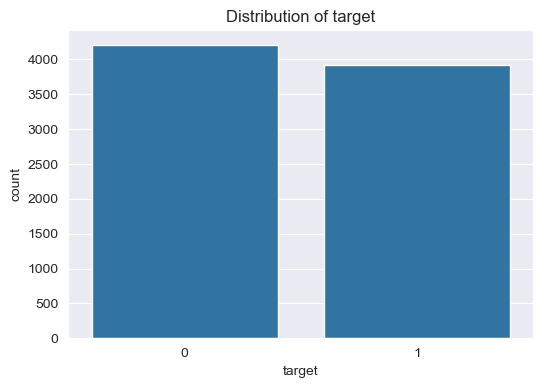

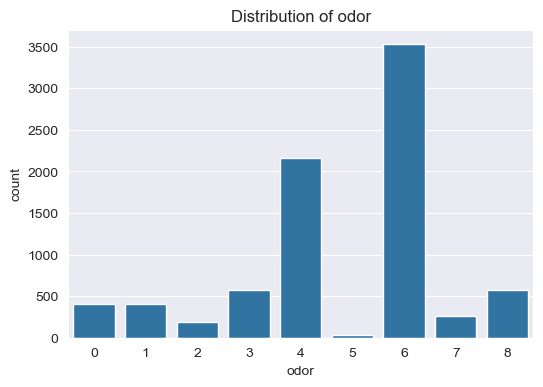

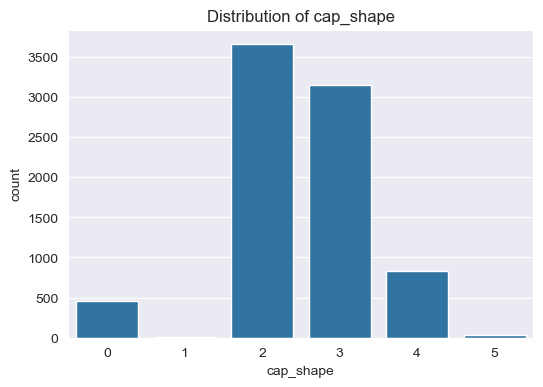

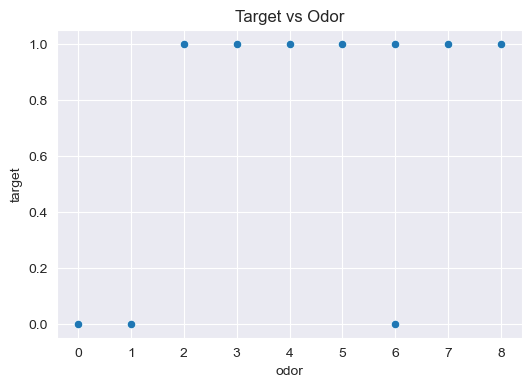

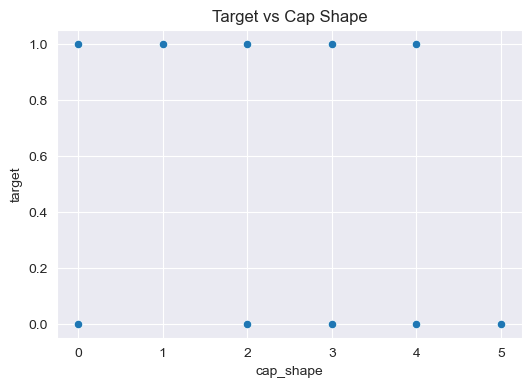

In [16]:
# Distribution plots
for col in ['target','odor','cap_shape']:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()

# Scatterplots: target vs odor
plt.figure(figsize=(6,4))
sns.scatterplot(x='odor', y='target', data=df)
plt.title("Target vs Odor")
plt.show()

# Scatterplots: target vs cap_shape
plt.figure(figsize=(6,4))
sns.scatterplot(x='cap_shape', y='target', data=df)
plt.title("Target vs Cap Shape")
plt.show()


## Predictive Analysis
We use scikit-learn to determine which feature is more predictive of mushroom edibility. One-hot encoding is applied to handle categorical predictors.

In [18]:
# --- Robust One-Hot Encoding & Random Forest ---

# Verify the DataFrame has the expected columns
expected_cols = ['odor', 'cap_shape']
missing_cols = [col for col in expected_cols if col not in df.columns]
if missing_cols:
    raise ValueError(f"Missing columns in df: {missing_cols}")

# One-hot encode features (let pandas handle prefixes automatically)
X = pd.get_dummies(df[expected_cols])
y = df['target']

# Optional: check the first few rows to confirm encoding
print("One-hot encoded feature matrix (first 5 rows):")
print(X.head())

# Split data into train/test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on test set and evaluate accuracy
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy (using both features): {accuracy:.4f}")

# Feature importance
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False, inplace=True)
print("\nFeature Importances:")
print(importances)


One-hot encoded feature matrix (first 5 rows):
   odor  cap_shape
0     7          2
1     0          2
2     1          0
3     7          2
4     6          2

Model Accuracy (using both features): 0.9852

Feature Importances:
odor         0.945301
cap_shape    0.054699
dtype: float64


### Optional: Compare Features Separately

We compare `odor` and `cap_shape` individually to see which is more predictive.


In [19]:
# Only odor
X_odor = pd.get_dummies(df[['odor']], prefix='odor')
X_train, X_test, y_train, y_test = train_test_split(X_odor, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_odor = accuracy_score(y_test, y_pred)
print(f"Accuracy with odor only: {accuracy_odor:.4f}")

# Only cap_shape
X_cap = pd.get_dummies(df[['cap_shape']], prefix='cap_shape')
X_train, X_test, y_train, y_test = train_test_split(X_cap, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_cap = accuracy_score(y_test, y_pred)
print(f"Accuracy with cap_shape only: {accuracy_cap:.4f}")


Accuracy with odor only: 0.9846
Accuracy with cap_shape only: 0.5612


## Conclusions
- **Odor** is the strongest predictor of mushroom edibility.
- Using **cap_shape** alone gives much lower predictive accuracy.
- Combined features achieve nearly the same accuracy as odor alone.
- Recommendation: prioritize odor in predictive models, and consider adding other features for improved performance.
